<a href="https://colab.research.google.com/github/SaraWestWA/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/SW_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



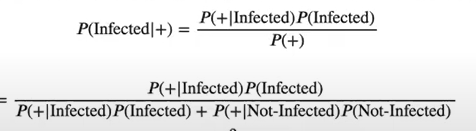

In [0]:
import pandas as pd
import numpy as np
# import scipy as

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

The Baysein proabability of A given B:

***P***(A|B)=***P***(B|A)* **P**(A)
**DIVIDED BY**
( ***P***(B|A)****P***(B) + ***P***(B|not A)****P***(not A) )

We begin knowing:

*   Probability of A & Not A (prior supposition)
*   Probability of B & False B


The Baysein proabability of A given B:

***P***(A|B)=***P***(B|A)* **P**(A)
**DIVIDED BY**
( ***P***(B|A)****P***(B) + ***P***(B|not A)****P***(not A) )

We begin knowing:

*   Probability of A & Not A (prior supposition)
*   Probability of B & False B


In [3]:
# calculation
prob_drunk = 0.001
prob_sober = 1- prob_drunk
prob_positive_if_drunk = 1
prob_positive_if_sober = 0.08

numerator = prob_positive_if_drunk*prob_drunk
denominator = numerator+(prob_positive_if_sober*(1-prob_drunk))
numerator/denominator


0.012357884330202669

In [4]:
# create a function to calculate the probability of being drunk with + test
prob_drunk = 0.001
prob_sober = 1- prob_drunk
prob_positive_if_drunk = 1
prob_positive_if_sober = 0.08


def prob_drunk_given_positive(prob_drunk, prob_positive_if_sober, prob_positive_if_drunk):
  numerator = prob_positive_if_drunk*prob_drunk
  denominator = numerator+(prob_positive_if_sober*(1-prob_drunk))
  x= numerator/denominator
  return x

prob_drunk_given_positive(0.001, 0.08, 1)


# numerator = (p_b_if_a)*p_a
# denominator = numerator + ((p_b_if_not_a)*(1-p_a)),
# p_a_if_b = numerator/denominator

# p_a_if_b


0.012357884330202669

In [5]:
# create a while loop to repeatedly calculate until the desired
# probability level & prepare arrays to make a table
num_tests=[]
count = 1
x = prob_drunk_given_positive(0.001, 0.08, 1)
print ('# tests: ',count)
print('prob of drunk:', x)
num_tests = [count]
prob_be_drunk=[x]
while x <0.95:
  x = prob_drunk_given_positive(x, 0.08, 1)
  count=count+1
  num_tests.append(count)
  prob_be_drunk.append(x)
  print ('# of breathalyzer tests: ',count)
  print('probability of being drunk:', x)

print(num_tests)
print(prob_be_drunk)



# tests:  1
prob of drunk: 0.012357884330202669
# of breathalyzer tests:  2
probability of being drunk: 0.13525210993291495
# of breathalyzer tests:  3
probability of being drunk: 0.6615996951348605
# of breathalyzer tests:  4
probability of being drunk: 0.9606895076105054
[1, 2, 3, 4]
[0.012357884330202669, 0.13525210993291495, 0.6615996951348605, 0.9606895076105054]


In [6]:
# Make a table to display the information
drunk_test_df = pd.DataFrame(
    [num_tests,
    prob_be_drunk],
    index =['# of breathalyzer tests','probability of being drunk']).T

drunk_test_df

,# of breathalyzer tests,probability of being drunk
0,1.0,0.012358
1,2.0,0.135252
2,3.0,0.661600
3,4.0,0.960690


In [7]:
# Make a table to display the information
drunk_test_df = pd.DataFrame(
    [num_tests,
    prob_be_drunk],
    index =['# of breathalyzer tests','probability of being drunk'])

drunk_test_df

,0,1,2,3
# of breathalyzer tests,1.000000,2.000000,3.0000,4.00000
probability of being drunk,0.012358,0.135252,0.6616,0.96069


### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)


In [0]:
import scipy.stats
?scipy.stats.bayes_mvs


In [9]:
# load lending club data set
# too big to be used from GitHub
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-05-29 18:10:49--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 44.228.179.66, 35.163.140.110, 52.89.160.109
Connecting to resources.lendingclub.com (resources.lendingclub.com)|44.228.179.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [              <=>   ]  22.05M  2.06MB/s    in 11s     

2020-05-29 18:11:01 (2.00 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23121687]



In [10]:
# unzip
! unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [11]:
# read in dataframe
# it's almost all bold, loaded as header
# funky rows at bottom, too
loans=pd.read_csv('LoanStats_2018Q4.csv', header=1,skipfooter=2)
# loans.head()
loans.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,5557.25,5557.25,6233.34,6233.34,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2751.79,2751.79,3053.17,3053.17,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5411.74,5276.45,5882.88,5735.81,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,5626.39,5626.39,6400.05,6400.05,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
loans.shape

(128412, 144)

In [13]:
# explore columns to select our options
loans['home_ownership'].value_counts()

MORTGAGE    63490
RENT        50596
OWN         13993
ANY           333
Name: home_ownership, dtype: int64

Select home ownership and purpose of loan as our columms to compare. Question what is the probability that a person who outright owns their home will take out a loan for home improvement.

In [14]:
loans['home_ownership'].isnull().sum()

0

In [15]:
loans['purpose'].value_counts()

debt_consolidation    70603
credit_card           34961
home_improvement       7512
other                  7094
major_purchase         2303
medical                1499
small_business         1051
car                    1037
house                   823
vacation                802
moving                  656
renewable_energy         71
Name: purpose, dtype: int64

In [16]:
loans['purpose'].isnull().sum()

0

The Baysein proabability of A given B:

***P***(A|B)=***P***(B|A)* **P**(A)
**DIVIDED BY**
( ***P***(B|A)****P***(B) + ***P***(B|not A)****P***(not A) )

We begin knowing:

*   Probability of A & Not A (prior supposition)
*   Probability of B & False B


# About here I went on a confused tangent

*  A=  probability of person taking a home improvement loan = 7512/128,412
*  B=  probability of home owner taking a loan = 13,993/128,412

Make a table to discover these numbers
*  A|B = probability of home improvement loan being taken by a home owner
*  B|A = probability of home owner taking a home improvement loan









In [17]:
# Make a smaller data frame with only our desired values
small = loans[['purpose','home_ownership']].copy()
small.head()

,purpose,home_ownership
0,debt_consolidation,RENT
1,debt_consolidation,RENT
2,credit_card,RENT
3,credit_card,OWN
4,debt_consolidation,RENT


In [18]:
myloans=pd.crosstab(small['purpose'],small['home_ownership'],margins=True)
myloans

home_ownership,ANY,MORTGAGE,OWN,RENT,All
purpose,,,,,
car,1,489,111,436,1037
credit_card,132,16164,3598,15067,34961
debt_consolidation,169,34804,7584,28046,70603
home_improvement,5,5795,1039,673,7512
house,1,439,149,234,823
major_purchase,1,1036,290,976,2303
medical,0,719,188,592,1499
moving,1,141,29,485,656
other,23,3063,795,3213,7094


In [39]:
myloans.T

purpose,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,All
home_ownership,,,,,,,,,,,,,
ANY,1,132,169,5,1,1,0,1,23,0,0,0,333
MORTGAGE,489,16164,34804,5795,439,1036,719,141,3063,37,472,331,63490
OWN,111,3598,7584,1039,149,290,188,29,795,8,116,86,13993
RENT,436,15067,28046,673,234,976,592,485,3213,26,463,385,50596
All,1037,34961,70603,7512,823,2303,1499,656,7094,71,1051,802,128412


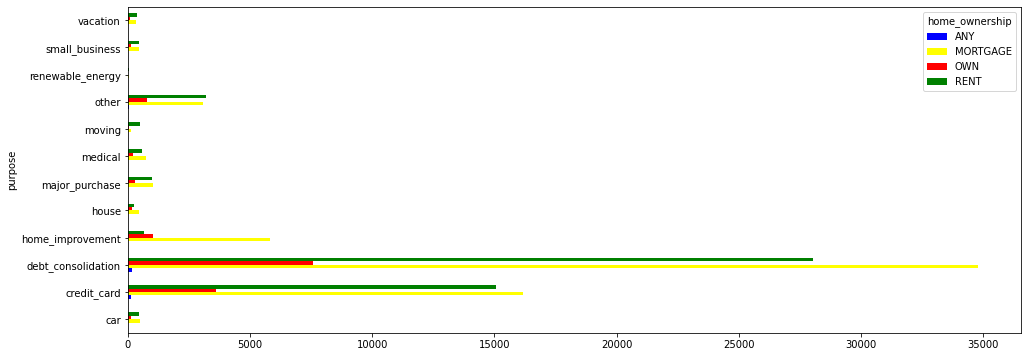

In [19]:
#make the table graphable by removing "All" columns
myloans2=pd.crosstab(small['purpose'],small['home_ownership'],margins=False)

myloans2.plot(kind='barh',color=['blue','yellow','red','green'], figsize=(16,6));


In [0]:
import scipy.stats as stats

In [70]:
# # baysian caluclations on OWN column
ml2a_mean, ml2a_var, mla2_std =scipy.stats.bayes_mvs(myloans2['OWN'])
print(ml2a_mean)
print(ml2a_var)
print(mlb2_std)

Mean(statistic=1166.0833333333333, minmax=(-3.990211723697712, 2336.1568783903635))
Variance(statistic=6225880.546296297, minmax=(2847905.114242471, 12248134.28332861))
Std_dev(statistic=7068.228470577405, minmax=(5959.854053768472, 8393.554358478523))


In [0]:
?np.array

In [22]:
myloans.describe()

home_ownership,ANY,MORTGAGE,OWN,RENT,All
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,51.230769,9767.692308,2152.769231,7784.000000,19755.692308
std,101.370734,18948.640080,4162.396929,15271.956811,38450.403794
min,0.000000,37.000000,8.000000,26.000000,71.000000
25%,0.000000,439.000000,111.000000,436.000000,823.000000
50%,1.000000,719.000000,188.000000,592.000000,1499.000000
75%,23.000000,5795.000000,1039.000000,3213.000000,7512.000000
max,333.000000,63490.000000,13993.000000,50596.000000,128412.000000


In [67]:
# # baysian caluclations on transposed table
# ml2b_mean, ml2b_var, mlb2_std =scipy.stats.bayes_mvs(myloans2.T['home_improvement'])
ml2b_mean, ml2b_var, mlb2_std =scipy.stats.bayes_mvs(myloans2.T)
print(ml2b_mean)
print(ml2b_var)
print(mlb2_std)

Mean(statistic=2675.25, minmax=(990.8981142929836, 4359.601885707016))
Variance(statistic=50518012.42222223, minmax=(35519860.34222048, 70451754.7687338))
Std_dev(statistic=7068.228470577405, minmax=(5959.854053768472, 8393.554358478523))


In [31]:
myloans.T.describe().round()

purpose,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,All
count,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,415.0,13984.0,28241.0,3005.0,329.0,921.0,600.0,262.0,2838.0,28.0,420.0,321.0,51365.0
std,405.0,13654.0,27624.0,3406.0,318.0,890.0,581.0,292.0,2757.0,28.0,410.0,314.0,50211.0
min,1.0,132.0,169.0,5.0,1.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,333.0
25%,111.0,3598.0,7584.0,673.0,149.0,290.0,188.0,29.0,795.0,8.0,116.0,86.0,13993.0
50%,436.0,15067.0,28046.0,1039.0,234.0,976.0,592.0,141.0,3063.0,26.0,463.0,331.0,50596.0
75%,489.0,16164.0,34804.0,5795.0,439.0,1036.0,719.0,485.0,3213.0,37.0,472.0,385.0,63490.0
max,1037.0,34961.0,70603.0,7512.0,823.0,2303.0,1499.0,656.0,7094.0,71.0,1051.0,802.0,128412.0


In [0]:
?sns.barplot

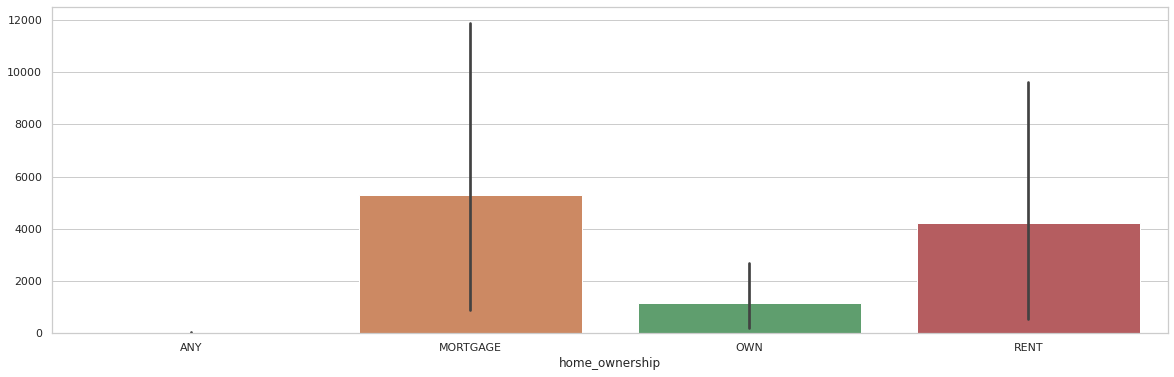

In [56]:
# create seaborn barplot
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.barplot(data=myloans2)

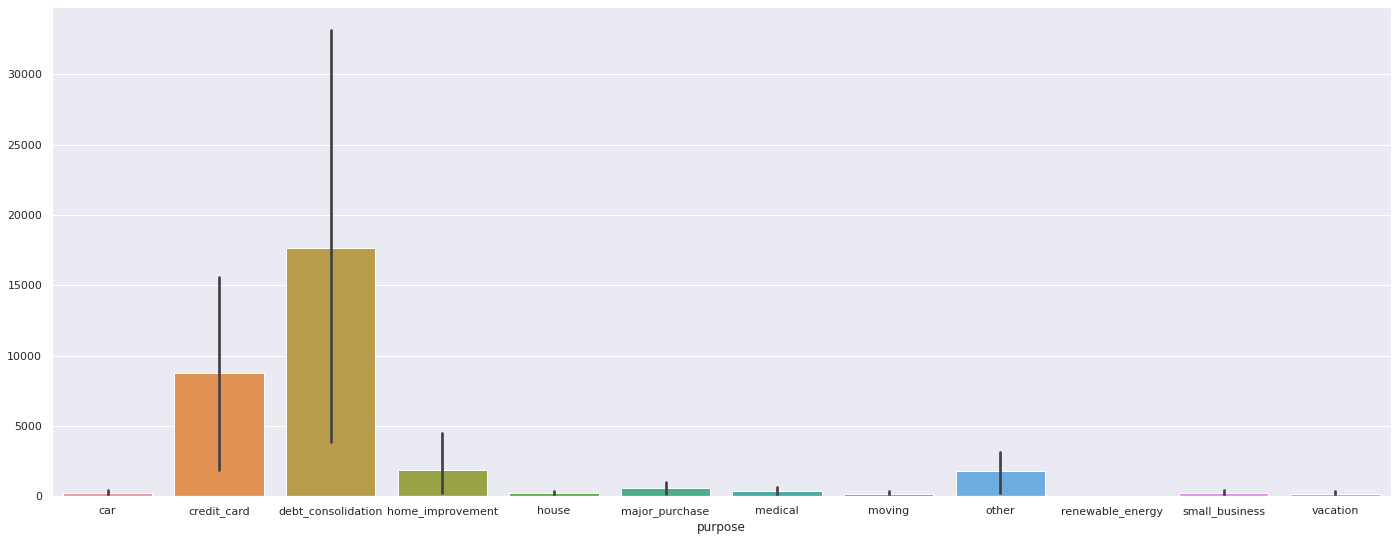

In [60]:
# create seaborn barplot
sns.set(style="whitegrid")
# handy size changer that I don't really understand
sns.set(rc={'figure.figsize':(24,9)})
ax = sns.barplot(data=myloans2.T)

In [84]:
# create confidence interval function
# data= column of dataframe or numpy array

def Con_Inv(data, confidence=0.95):
  data=np.array(data)
  mean=np.mean(data)
  n=len(data)
  stand_error=np.std(data,ddof=1)/np.sqrt(n)
  margin_error = stand_error*stats.t.ppf((1+confidence)/2, n-1)
  return(mean, mean-margin_error, mean+margin_error)

Con_Inv(myloans2.T['home_improvement'])

(1878.0, -2332.678739338897, 6088.678739338897)

In [0]:
import matplotlib.pyplot as plt

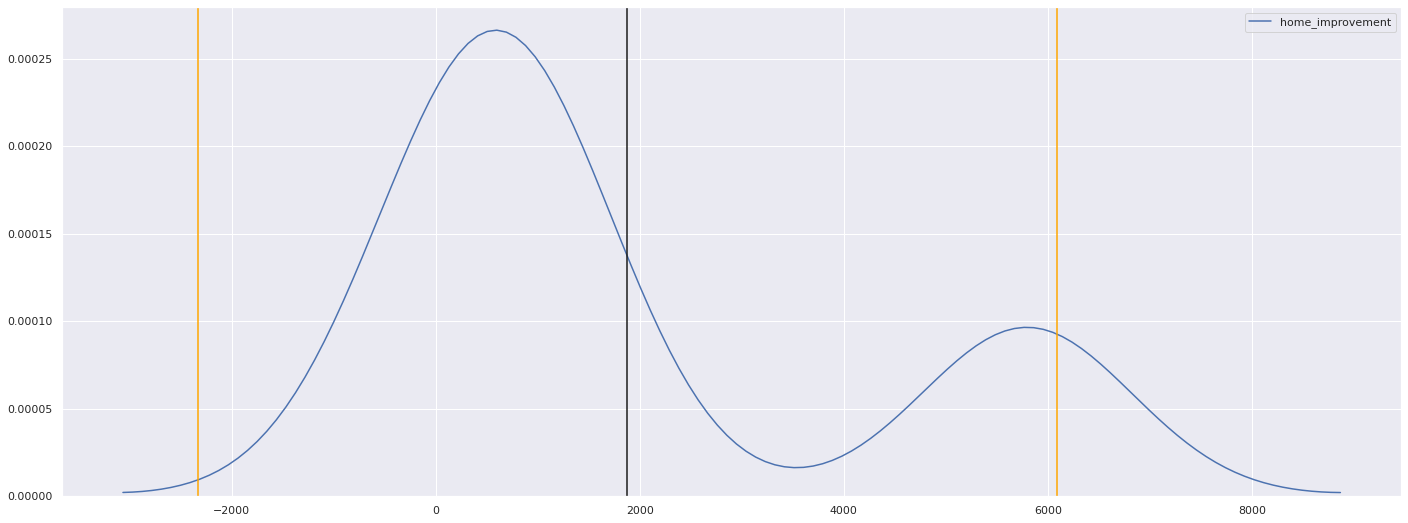

In [0]:
# plot confidence interval from crosstab
myloans2_array =np.array(myloans2)
sns.kdeplot(myloans2.T['home_improvement'])

# CIg= Con_Inv(myloans2.T['home_improvement'])
#mean
plt.axvline(x=CIg[0], color ='k')
# upper and lower confidence interval
plt.axvline(x=CIg[1], color ='orange')
plt.axvline(x=CIg[2], color ='orange');

In [0]:
# # baysian caluclations on transposed table
# ml2b_mean, ml2b_var, mlb2_std =scipy.stats.bayes_mvs(myloans2.T['home_improvement'])
ml2b_mean, ml2b_var, mlb2_std =scipy.stats.bayes_mvs(myloans2.T)
print(ml2b_mean)
print(ml2b_var)
print(mlb2_std)

Mean(statistic=2675.25, minmax=(990.8981142929836, 4359.601885707016))
Variance(statistic=50518012.42222223, minmax=(35519860.34222048, 70451754.7687338))
Std_dev(statistic=7068.228470577405, minmax=(5959.854053768472, 8393.554358478523))


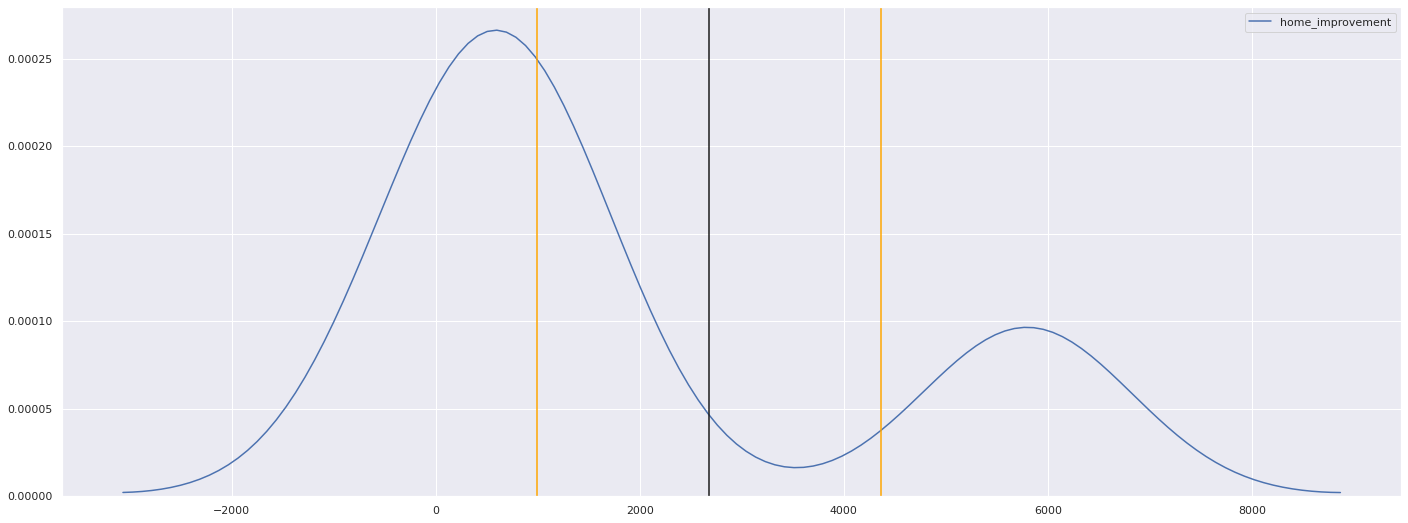

In [92]:
# plot baysian means?
# I have no idea how to pull out the numbers I need with code

myloans2_array =np.array(myloans2)
sns.kdeplot(myloans2.T['home_improvement'])

#mean
plt.axvline(x=2675.25, color ='k')
# not sure these are the numbers needed
# upper and lower mean caluclations
plt.axvline(x=(990.8981142929836), color ='orange')
plt.axvline(x=4359.601885707016, color ='orange');

In [0]:
# duplicate cell so labels are near
# # baysian caluclations on OWN column
ml2a_mean, ml2a_var, mla2_std =scipy.stats.bayes_mvs(myloans2['OWN'])
print(ml2a_mean)
print(ml2a_var)
print(mlb2_std)

Mean(statistic=1166.0833333333333, minmax=(-3.990211723697712, 2336.1568783903635))
Variance(statistic=6225880.546296297, minmax=(2847905.114242471, 12248134.28332861))
Std_dev(statistic=7068.228470577405, minmax=(5959.854053768472, 8393.554358478523))


In [23]:
chi_square, p_value, dof, expected = stats.chi2_contingency(myloans)

print('chi squared ', chi_square)
print('p_value ', p_value)
print('degrees of freedom ', dof)
# print('expected ', expected)


chi squared  3826.222461092544
p_value  0.0
degrees of freedom  48


In [0]:
?np.where

In [0]:
# # went into pure math mode and began creating a crosstab from scratch!
# # make extra columns to designate when a home owner takes a home improvement loan
# small['owner']=  np.where(small['home_ownership'] == 'OWN', 1, 0)
# small.sample(10)


In [0]:
# # went into pure math mode and began creating a crosstab from scratch!
# small['fixer']=  np.where(small['purpose'] == 'home_improvement', 1, 0)
# small.sample(10)

In [0]:
# # went into pure math mode and began creating a crosstab from scratch!
# # This calculates the number of loans which taken by home owners for
# # home improvement
# small['owner-fix-it'] = np.where(
#     (
#         (small['fixer'] == 1) & (small['owner'] == 1)
#         ), 1, 0)
# small['owner-fix-it'].value_counts()

###3) In your own words, summarize the difference between Bayesian and Frequentist statistics -->
If you're unsure where to start, check out this blog post of Bayes theorem with Python.

Frequentist statistics relys upon measured samples. It is based upon the presumtion that the data, given a large enough sample, will fall into a normal curve. All information is drawn based upon the sample being used.

Bayesian statistics relys upon information that can be "known" before making calcultions.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!